In [1]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv("../metrics/All_tfidf_features_99_all.csv", index_col=0)
df.head()

,company,jobtitle,jobtitle_orig,ability,ability develop,ability work,able,access,accounting,accredited,...,workflow,working,working knowledge,world,writing,written,year,year experience,year related,year relevant
21,0.0,Data Scientist,Data Scientist - Risk,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0
36,0.0,Data Scientist,Data Scientist - Operations,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.10848,0.0,0.0,0.0
39,0.0,Data Scientist,Data Scientist,0.0,0.0,0.0,0.0,0.232897,0.0,0.0,...,0.0,0.0,0.0,0.23584,0.0,0.0,0.00000,0.0,0.0,0.0
40,0.0,Data Scientist,Data Scientist,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0
48,0.0,Data Engineer,Data Engineer – Information Management & Analy...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0


In [7]:
#reduce dimension of data to 2D using t-sne algorithm
model = TSNE(n_components=2, random_state=0, perplexity = 30, n_iter=5000)
points = model.fit_transform(df.iloc[:,3:]) 

In [8]:
# plot the result
vis_x = points[:, 0]
vis_y = points[:, 1]

labels = list(df['jobtitle'])
data = pd.DataFrame()
data['x'] = vis_x
data['y'] = vis_y
data['labels'] = labels

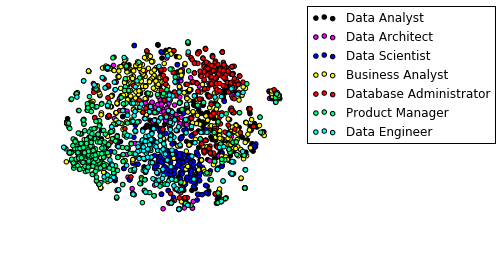

In [24]:
labels = list(set(df['jobtitle']))
colors = ['black', 'magenta','blue',  'yellow', 'red', 'springgreen',  'aqua']
for i in range(len(labels)):
    plotting = data.loc[data['labels']==labels[i]]
    plt.scatter(plotting['x'], plotting['y'],c = [colors[i]]*plotting.shape[0],label=labels[i])
#ax = plt.gca()
#plt.colorbar(ticks=range(5))
#plt.clim(-0.5, 4.5)
plt.axis('off')
plt.xlim([-20, 30])
plt.ylim([-20, 20])
plt.legend(bbox_to_anchor=(1.4, 1.05))
plt.show()

In [6]:
confusion = pd.read_csv("../metrics/confusion_matrix_all.csv", index_col=0)
confusion

,Data Engineer,Data Analyst,Data Scientist,Product Manager,Business Analyst,Database Administrator,Data Architect
0,0.350,0.000000,0.042553,0.000000,0.000000,0.000000,0.033333
1,0.075,0.460317,0.042553,0.016393,0.078652,0.032787,0.033333
2,0.275,0.142857,0.851064,0.016393,0.022472,0.016393,0.100000
3,0.175,0.079365,0.021277,0.901639,0.089888,0.049180,0.066667
4,0.050,0.238095,0.021277,0.049180,0.752809,0.131148,0.133333
5,0.025,0.047619,0.021277,0.016393,0.044944,0.737705,0.000000
6,0.050,0.031746,0.000000,0.000000,0.011236,0.032787,0.633333


In [7]:
array = [list(confusion.iloc[i,:]) for i in range(confusion.shape[0])]

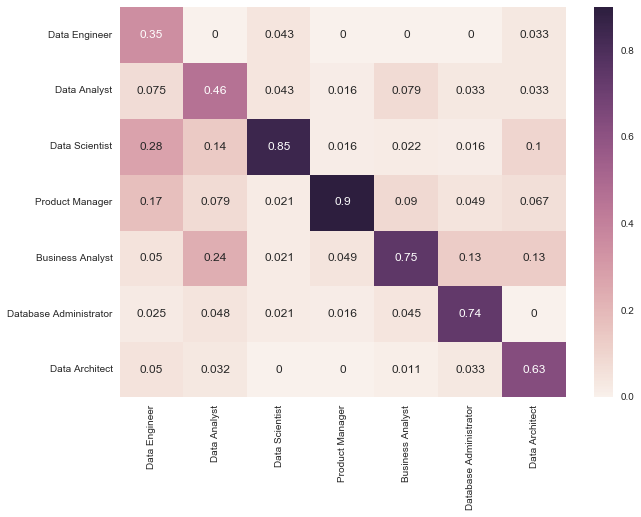

In [8]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(array, index = list(confusion.columns),
                  columns = list(confusion.columns))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)